# **Linear Regression**

In this class we will introduce the concept of regression models, with a particular focus on linear and logistic regression. This class is meant as a recap for those of you who may have struggled with it in previous modules or are new to the topic. We use a simple python examples to show how one would do basic regression analyses.

We will get into much more detail about these when we talk about Generalised linear models in MOOC 5.

**What is Linear Regression?**

In many business research situations the path to decision making lies in understanding the relationship between two or more variables.

For example, can the price of airline stock be predicted using a variable like the cost of oil? or how strong a relationship is there between a company’s sales figures and their advertising budget?

Regression Analysis is the process of constructing a mathematical model or function that can be used to predict one variable using another variable (simple linear regression) or variables (multiple linear regression). The basic idea is to create a line of best fit in the data.


By linear we are really saying we have a function such as:

>$y_{i}=a+bx_{i} + e_{i}$ $ where $ $i=1 $ $to$  $n$

>$y_{i}$ is known as the dependent variable and is generally the variable we are trying to predict and $i$ is the row number in the dataset.

>$x_{i}$ is the independent variable and is the one we are using as a predictor variable.

>$a$ is the intercept and is the expected mean when $x_{i}$ is zero.
>$b$ is the slope or the rate of change in $y$ for a unit increase in $x$.

>$e_{i}$ is **independently normally distributed with a mean of 0 and a constant variance**.

Linear Regression can be considered has one of the most basic forms of machine learning or artifical intelligence. It uses a method called Min Squared Error to come up with the most appropriate values of $a$ and $b$. It does however assume that the error term is independently normaly distributed with a constant variance.

From a data mining position we will use it in a number of ways and they are as follows:


*   Predict missing values
*   Identify important features in a dataset
*   Understand if there are hidden features



The wonderful thing about linear regression is that we can easily understand the impact independent variables have on the outcome or dependent variable. The draw back is that things can go very wrong if we break the assumtpions such as the normality of the error or the consistency of the error variance. These are important issues and should not be overlooked.

It is also worth framing in your mind the idea of $y_{i}=a+bx_{i} + e_{i}$ as a basis for all prediction problems. I appreciate we cannot predict all variables with one input or independent variable or the assumption that the functinal structure is linear, but when we try to solve a problem it is always good to try and ask yourself what are the output/dependent and input/independent variables.



**Example**

Fedbus have been using radio advertisements to advertise their weekend excursions for the past 8 months. The managing director has asked the sales team to assess the effect of these ads on the number of bookings.

The example data for this example can be found [here](https://drive.google.com/file/d/1UVZozqcZdOX8vnM7t1DZurs2yJJpEcE4/view?usp=sharing)


Now we are going to use several python libraries to help us with our analysis. They are all imported below.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as tm
import numpy as np

from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


**Note**
If you are using google colabs you will need to connect to google drive using the following code.

In [4]:
import pandas as pd

df3 = pd.DataFrame({
    "Month": [1,2,3,4,5,6,7,8],
    "No. of Adverts (X)": [20,24,30,23,27,25,32,35],
    "No. of bookings (Y)": [61,77,72,66,85,77,90,100]
})

print(df3)
print(df3.columns) 

   Month  No. of Adverts (X)  No. of bookings (Y)
0      1                  20                   61
1      2                  24                   77
2      3                  30                   72
3      4                  23                   66
4      5                  27                   85
5      6                  25                   77
6      7                  32                   90
7      8                  35                  100
Index(['Month', 'No. of Adverts (X)', 'No. of bookings (Y)'], dtype='object')


Print the data to check that it has imported properly. You should have 8 rows and 3 columns.

In [5]:
print(df3)

   Month  No. of Adverts (X)  No. of bookings (Y)
0      1                  20                   61
1      2                  24                   77
2      3                  30                   72
3      4                  23                   66
4      5                  27                   85
5      6                  25                   77
6      7                  32                   90
7      8                  35                  100


If you have managed to import the data then you will now be able to start building the regression model. Initially, we are going to use "Sklearn" which is a python machine learning library. The first thing one usually does when completing a linear regression is display the relationship between the independent and the dependent variables. What are we looking for when we display a graph?

Generally we are looking for a shape that "closely" resembles a line. We can handle "curved" shapes but you must be able to apply a linear model to them. If we look at the following model:

>$y_{i}=a+bx_{i}^ 2 + e_{i}$ $ where $ $i=1 $ $to$  $n$

This is not a linear in shape as it is a quadratic curve but the $b$ parameter is in a linear form and thus regression analysis can be applied. We will get back to this later. Use the following code to plot a scatter plot of the data.




<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

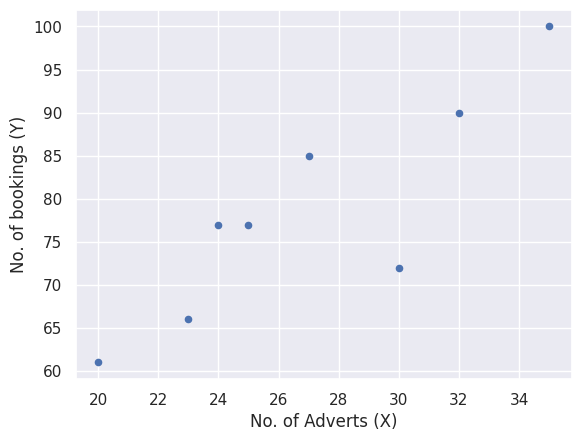

In [7]:

#!pip install matplotlib # install matplotlib using pip

import matplotlib.pyplot
#as plt # import the module into the session
import seaborn as sns
sns.set()
%matplotlib inline
df3.plot.scatter(x='No. of Adverts (X)', y='No. of bookings (Y)')



You can see from the graph that a rough line could actually give a reasonable reflection of the sales process. Its not perfect but consider that we will always have an error in the model, so for this case a line would seem to be a reasonable solution. The error term is designed to "adjust" for the variation and one would expect it to vary acording to a random normal distribution. If you go to the following [link](https://drive.google.com/file/d/1yoGR7NLyzD0Zs9FOAyPtqZ1hJis_x3-P/view?usp=sharing) you will find a chapter on simple linear regression by Howard Seltman from CMU. It is worth while reading this as it will give you a flavour of the topic.

In [8]:
df3.columns

Index(['Month', 'No. of Adverts (X)', 'No. of bookings (Y)'], dtype='object')

<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

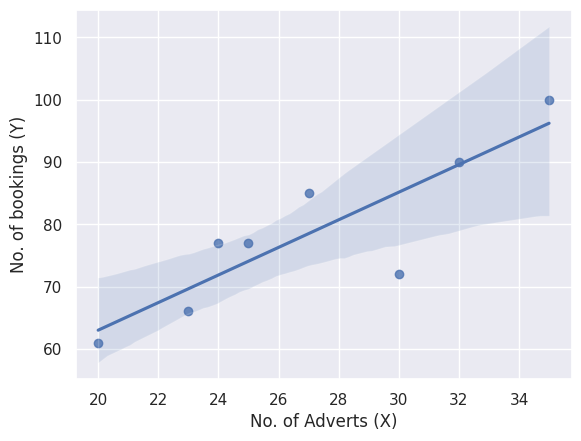

In [9]:
# df3.plot.scatter(x="No. of Adverts (X)", y="No. of bookings (Y)")
sns.regplot(x="No. of Adverts (X)", y="No. of bookings (Y)", data=df3)

So in the code above we have completed a regression plot. You will see a shaded plot around the line. This corresponds to a 95% confidence interval for the regression. This will often be inside the actual points because we are predicting a confidence interval for the mean no of bookings for a particular no of adverts and not the overall no of bookings. This sounds strange but when we implement inferential statistics we always assume that the experiment can be repeated multiple times, and we measure the theoritcal range of the mean for these experiments. If you don't get this now don't worry, and for those who do, maybe you should read about the battle between frequentist and baysian statistics. There is a nice article [here](https://www.theregister.co.uk/2017/06/22/bayesian_vs_frequentist_ai/).


So we have now examined the data and feel reasonably confident that a linear regression can be used to model bookings from the number of adverts. You may have read about using a training and test dataset as assessment tool for Machine Learning algorithms. We will get to this later but for now all we want to do is to see if we can model bookings from adverts.

In order to do this we need to convert our pandas dataframe to a numpy array. You can see how to do this below.

In [10]:
x=df3['No. of Adverts (X)'].to_numpy().reshape((-1, 1))
y=df3['No. of bookings (Y)'].to_numpy().reshape((-1, 1))

print(x)
print(y)

[[20]
 [24]
 [30]
 [23]
 [27]
 [25]
 [32]
 [35]]
[[ 61]
 [ 77]
 [ 72]
 [ 66]
 [ 85]
 [ 77]
 [ 90]
 [100]]


Now we will create a model and implement the regressions analysis.
From the graph output in the last sns.regplot we can see that the the model looks like a reasonable fit. However, can we get a metric/measure to tells how good a fit we have?

Well the answer is Yes & No. There is a term called the coefficent of determination or $R^2$ and this is outlined below. You will note this is ~75%. This is just a single measure and can be misleading but it is a measure than can guide you if your model is going in the right direction. **However, be warned don't expect a high  $R^2$ to give you good predictions.** They don't go hand in hand. We will get to this in a latter session.

You will also notice in the code below we print out the intercept ($a$) and the slope coefficent ($b$).

In [11]:
model =LinearRegression().fit(x,y)

r_sq = model.score(x, y)
y_pred=model.predict(x)
df3['error']=y-y_pred

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficent:', model.coef_)



coefficient of determination: 0.7541051880057117
intercept: [18.67045455]
coefficent: [[2.21590909]]


Now we have got the $R^2$ and the $a$ and $b $ terms but what do they tell us and can we have confidence in the model?

Remember when we do a linear regression we have a number of assumptions and we should check these. The first thing we should check is the independence of the error term. This is important and should be checked in any modelling process we use. If the errors are not independent then we are probably not optimising the model structure or in lay man's language we have left a term out or the variables are in an incorrect functional form.

So lets plot the error term against the dependent variable and see what it looks like. The plot can be seen below:

<Axes: xlabel='No. of bookings (Y)', ylabel='error'>

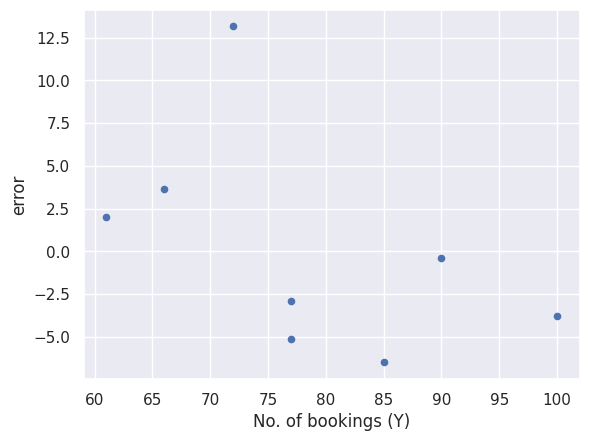

In [12]:
df3['error']=y_pred-y
#print(df3)
sns.set()
%matplotlib inline
df3.plot.scatter(x='No. of bookings (Y)', y='error')


#sns.regplot('No. of bookings (Y)', # Horizontal axis
#           'error', # Vertical axis
#           data=df3)



This plot is really interesting as the error terms seem to go from positive to negative as the number of bookings increase. This tells us that the errors may not really be independent and the model is a little suspect. We need to examine this further.

One of the drawbacks with sklearn is that it doesn't really give enough detailed statistics on the model assumptions. It is really good at predition but when you make assumptions, such as in our case with a linear regression approach, then we need to get some hard facts about the error distribution and how far the calculated $a$ and $b$ terms are from zero.

We are now going to use python's statsmodels library. In the section of code where we import the python libraries we had the following piece of code:

> *statsmodels.formula.api as sm*

This allows us to import the relevant code from statsmodels and complete a much more detailed linear regression analysis.

You should note in the code below that we use a dataframe and you can specify the formula in the following line:

>formula_str="Y~X"

this says Y is the dependent variable and X is an independent variable.





In [13]:

df4=df3
df4=df4.rename(columns={"No. of bookings (Y)":"Y","No. of Adverts (X)":"X"})
formula_str="Y~X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())


   Month   X    Y      error
0      1  20   61   1.988636
1      2  24   77  -5.147727
2      3  30   72  13.147727
3      4  23   66   3.636364
4      5  27   85  -6.500000
5      6  25   77  -2.931818
6      7  32   90  -0.420455
7      8  35  100  -3.772727
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     18.40
Date:                Tue, 09 Dec 2025   Prob (F-statistic):            0.00515
Time:                        20:55:49   Log-Likelihood:                -25.598
No. Observations:                   8   AIC:                             55.20
Df Residuals:                       6   BIC:                             55.36
Df Model:                           1                                         
Covariance Type:            

/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


We have now got a much more extensive analysis to determine if our model works. We won't go into enormous detail here but lets focus on the error term and the paremater estimates.

**Error Analysis**

The error term has been analysed using a number of statistics in this analysis. The first is the 'Jarque-Bera' statistic. This gives a $Chi^2$ probability value of 0.44, which is not significant ie >0.05. This tells us that there is no evidence to suggest that error term does not follow a normal distribution. A note of warning, many practioneers prefer to use an alternative test such as the Shapiro Wilks test.

The next one we look at is the Durbin Watson which has a value of 2.16. Generally, if this lies between 1.5 and 2.5 then we can accept the assumuption that there is no significant auto-correlation between the errors, thus, there is no evidence to suggest that the errors are not  independent.

**Model Fit**

You will note that the $R^2$ is 0.75. This value will range between 0 and 1. Where 0 reperesents a complete lack of fit and 1 being a perfect fit. Remember, it is not the holy grail of modelling as in theory you will get a perfect fit if you have as many parameters as the number of data points.

Generally, we do a few quick checks. The first is to examine the $P>|t| $ for each paremeter. The p value for the intercept ($a$) and slope ($b$) are given as 0.235 and 0.005 respectively. These results tell us that the intercept ($a$) is not significantly different from zero but there is strong evidence that independent $b$ variable is, as the p value < 0.05. This tells us that we could use a model with no intercept. But before we do this we should examine the AIC(55.20)(Akaike Information Criterion) and BIC(55.36)(Bayesian Information Criterion). Both of these terms are very useful as they will penalise large models relative to the information they are attempting to model. If you add more independent variables and the quality of the results does not improve then both measures will increase. So if we remove the intercept term we should derive new AIC and BIC statistics. The results are shown in the code below.



In [14]:
formula_str="Y~0+X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

   Month   X    Y      error
0      1  20   61   1.988636
1      2  24   77  -5.147727
2      3  30   72  13.147727
3      4  23   66   3.636364
4      5  27   85  -6.500000
5      6  25   77  -2.931818
6      7  32   90  -0.420455
7      8  35  100  -3.772727
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              964.4
Date:                Tue, 09 Dec 2025   Prob (F-statistic):                    9.27e-09
Time:                        20:59:45   Log-Likelihood:                         -26.617
No. Observations:                   8   AIC:                                      55.23
Df Residuals:                       7   BIC:                                      55.31
Df Model:                          

/home/ug/orlovsd2/miniforge3/envs/sunpy/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


You will have noticed that we have changed the following line:
>formula_str="Y~0+X"

This tells statsmodel to drop the intercept.

Now notice how the AIC (55.23) marginally increases and the BIC (55.31) decreases. This suggest that there is no real benifit to the intercept. This is really important to understand as these statistics help is with the selection of variables for our models.

**However, this is not the case with the intercept unless we have a genuine belief that the Y variable will be zero when the X variable is Zero. If you don't know this then never drop the intercept.** Also excluding the intercept can create a non-zero mean for the error, which as we noted above is an assumption for regression.

So by now you are probably a little confused. The following rules will help you with your model building:



*   Graph the errors against the predicted and the actual dependent variable.
*   Use a combination of AIC, BIC and p values to make a decision about reducing or increasing the number of independent variables.
*   Use the $R^2$ (coefficent of determination) with caution.
*   Examine the Durbin Watson statistic to establish if the the errors are independent.


Most of you will have asked the following question:
> Why not just do a correlation analysis?

Well the answer to this question is quite long, but to be as succent as possible I would always say to students that this strategy has the following issues:




*   Correlation is not causation
*   Correlation results can be be highly significant when the datasets are large but the actual correlation result can be quite low.
*   When we examine datasets with more than 1 independent variable, correlation really doesn't tells us a lot, as independent variables can possess what is known as *Multi-Collinearity*. Multi-Collinearity will mislead investigators as to which variables are important in our analyses.

We will dicuss this issue in more detail later as it is extremely important when attempting to assess which variables are going to have a potential influence on our analysis.





